# Neural Network Basics

## Topics Covered:

1. Linear Layers
   
   - Understanding linear transformations
   - Implementation in PyTorch
   - Bias terms

2. Activation Functions
   - ReLU, Sigmoid, Tanh
   - When to use each
   - Implementation and visualization

3. Building Neural Network Modules
   - nn.Module class
   - Creating custom layers
   - Forward method implementation

4. Loss Functions
   - Common loss functions
   - When to use each
   - Implementation examples

5. Optimizers
   - SGD
   - Adam
   - Learning rate selection

6. Basic Training Loops
   - Forward pass
   - Loss computation
   - Backward pass
   - Parameter updates

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## Linear Layers

A linear layer performs the operation:
y = Wx + b

Let us implement this in PyTorch

In [2]:
# create a linear layer
in_features = 3
out_features = 2

linear_layer = nn.Linear(in_features, out_features)

# print the layer parameters
print(linear_layer.weight)
print(linear_layer.bias)


Parameter containing:
tensor([[ 0.0642,  0.2635, -0.1753],
        [-0.1713,  0.1433, -0.3904]], requires_grad=True)
Parameter containing:
tensor([-0.1881, -0.1414], requires_grad=True)


In [3]:
linear_layer.weight.shape

torch.Size([2, 3])

In [4]:
linear_layer.bias.shape

torch.Size([2])

In [5]:
# create an input tensor
x = torch.tensor([1.0, 2.0, 3.0])

In [6]:
y = linear_layer(x)

In [7]:
y.shape

torch.Size([2])

In [8]:
y

tensor([-0.1228, -1.1972], grad_fn=<ViewBackward0>)

In [9]:
# manual computation yielding the same results:
manual_y = x @ linear_layer.weight.T + linear_layer.bias
manual_y

tensor([-0.1228, -1.1972], grad_fn=<AddBackward0>)

## Training a Linear Layer

Now that we understand how a linear layer transforms input, let's see how it learns. We'll:
1. Create a simple regression problem
2. Use a linear layer to solve it
3. Train the layer using gradient descent

Our task: Learn the transformation y = 2x + 1
- This is a simple linear relationship
- The weight should learn to be close to 2
- The bias should learn to be close to 1

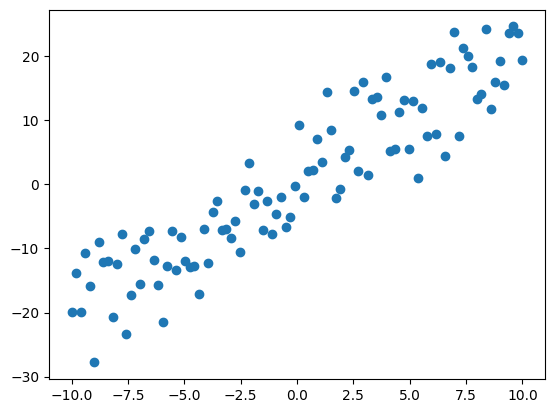

In [10]:
# Create synthetic data
x = torch.linspace(-10, 10, 100).reshape(-1, 1)  # Input values
y_true = 2 * x + 1  # True relationship we want to learn

# Add noise to the data
y = y_true + torch.normal(mean=0, std=5, size=x.shape)

# Plot the data
plt.scatter(x, y, label='Noisy data')

In [11]:
# Defining the right linear layer for this problem
linear_layer = nn.Linear(in_features=1, out_features=1)

# one input feature x, and one output feature y

In [12]:
# Checking the initialization parameters
linear_layer.weight
linear_layer.bias



Parameter containing:
tensor([0.9044], requires_grad=True)

In [13]:
# Define loss function for training
mse = nn.MSELoss()

# Define optimizer
optimizer = optim.SGD(linear_layer.parameters(), lr=0.01, momentum=0)



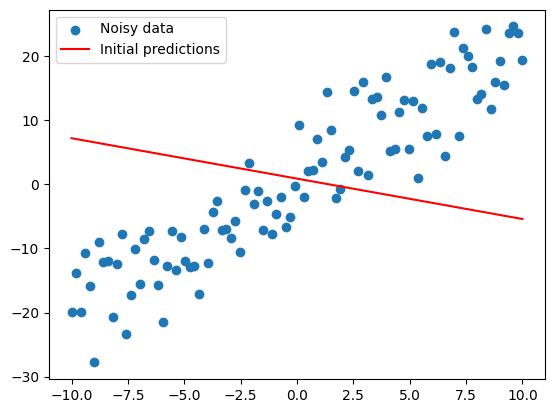

In [14]:
# initial state before training

# Let's see what we predict before we start training

y_pred = linear_layer(x)

# Plot the data and the predictions
plt.scatter(x, y, label='Noisy data')
plt.plot(x, y_pred.detach(), label='Initial predictions', color='red')
plt.legend()
plt.show()

# The method detached is required because
# a tensor with requires_grad=True is being used in the computation
# and cannot be used for plotting

In [15]:
# Setup training loop

n_epochs = 1000
losses = []

for epoch in range(n_epochs):
    #forward pass
    y_pred = linear_layer(x)
    # we consider that we don't have access to the true y values
    loss = mse(y_pred, y)
    losses.append(loss.item())

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # remember that we gave the optimizer the parameters

Text(0, 0.5, 'Loss')

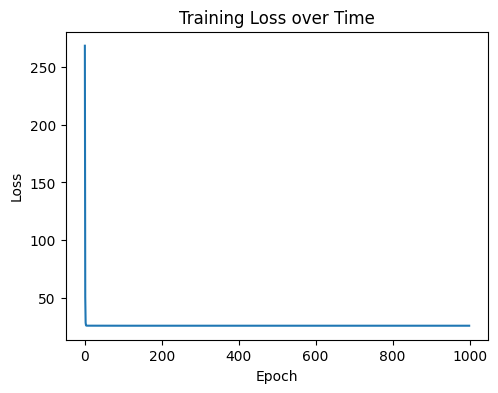

In [16]:
# visualizing loss (mse):

# Create a figure with two subplots
plt.figure(figsize=(12, 4))

# Plot 1: Training Loss
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')

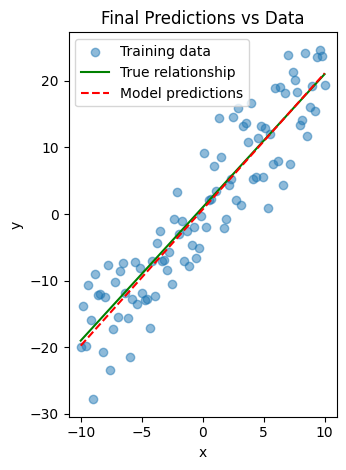

Final model parameters:
Weight: 2.0441
Bias: 0.6837


In [17]:
# Plot 2: Data, True Line, and Predictions
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5, label='Training data')
plt.plot(x, y_true, 'g-', label='True relationship')  # Adding the true line in green
plt.plot(x, y_pred.detach(), 'r--', label='Model predictions')  # Making predictions dashed for better distinction
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Predictions vs Data')
plt.legend()

plt.tight_layout()
plt.show()

# Print final model parameters
print("Final model parameters:")
print(f"Weight: {linear_layer.weight.item():.4f}")
print(f"Bias: {linear_layer.bias.item():.4f}")

In [18]:
# let us compare with sklearn to see if it is working

from sklearn.linear_model import LinearRegression

# Convert PyTorch tensors to numpy for sklearn
X_np = x.detach().numpy()
y_np = y.detach().numpy()

In [19]:
sk_linear = LinearRegression()
sk_linear.fit(X_np, y_np)

# Print sklearn's model parameters
print("\nSklearn's model parameters:")
print(f"Weight: {float(sk_linear.coef_[0]):.4f}")  # Convert to float first
print(f"Bias: {float(sk_linear.intercept_):.4f}")  # Convert to float first


Sklearn's model parameters:
Weight: 2.0441
Bias: 0.6837


## Activation Functions

In [55]:
x = torch.linspace(-3, 3, 100)

In [59]:
# define common activation functions
relu = nn.ReLU()
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()
leaky_relu = nn.LeakyReLU(negative_slope=0.1)

In [60]:
# apply activation functions
y_relu = relu(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_leaky_relu = leaky_relu(x)


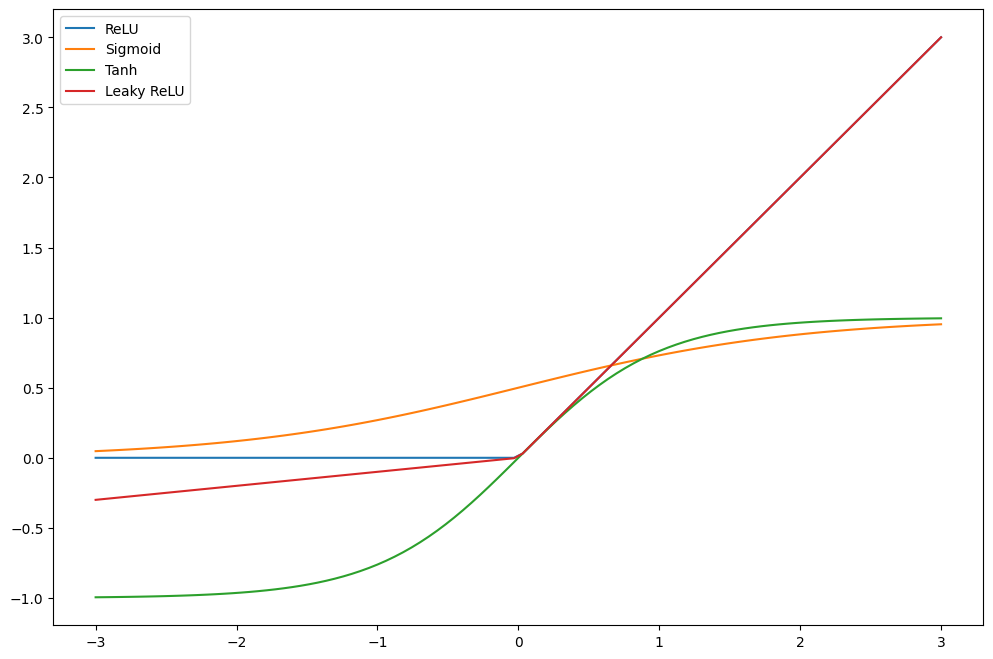

In [61]:
# plot all activation functions
plt.figure(figsize=(12, 8))
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_tanh, label='Tanh')
plt.plot(x, y_leaky_relu, label='Leaky ReLU')
plt.legend()

In [62]:
# Looking at their derivatives
x.requires_grad_(True)

tensor([-3.0000, -2.9394, -2.8788, -2.8182, -2.7576, -2.6970, -2.6364, -2.5758,
        -2.5152, -2.4545, -2.3939, -2.3333, -2.2727, -2.2121, -2.1515, -2.0909,
        -2.0303, -1.9697, -1.9091, -1.8485, -1.7879, -1.7273, -1.6667, -1.6061,
        -1.5455, -1.4848, -1.4242, -1.3636, -1.3030, -1.2424, -1.1818, -1.1212,
        -1.0606, -1.0000, -0.9394, -0.8788, -0.8182, -0.7576, -0.6970, -0.6364,
        -0.5758, -0.5152, -0.4545, -0.3939, -0.3333, -0.2727, -0.2121, -0.1515,
        -0.0909, -0.0303,  0.0303,  0.0909,  0.1515,  0.2121,  0.2727,  0.3333,
         0.3939,  0.4545,  0.5152,  0.5758,  0.6364,  0.6970,  0.7576,  0.8182,
         0.8788,  0.9394,  1.0000,  1.0606,  1.1212,  1.1818,  1.2424,  1.3030,
         1.3636,  1.4242,  1.4848,  1.5455,  1.6061,  1.6667,  1.7273,  1.7879,
         1.8485,  1.9091,  1.9697,  2.0303,  2.0909,  2.1515,  2.2121,  2.2727,
         2.3333,  2.3939,  2.4545,  2.5152,  2.5758,  2.6364,  2.6970,  2.7576,
         2.8182,  2.8788,  2.9394,  3.00

In [64]:
def compute_derivative(x, activation):
    x.grad = None
    y = activation(x)
    y.backward(torch.ones_like(y))

    return x.grad

In [65]:

# compute derivatives for all activation functions
relu_deriv = compute_derivative(x, relu)
sigmoid_deriv = compute_derivative(x, sigmoid)
tanh_deriv = compute_derivative(x, tanh)
leaky_relu_deriv = compute_derivative(x, leaky_relu)



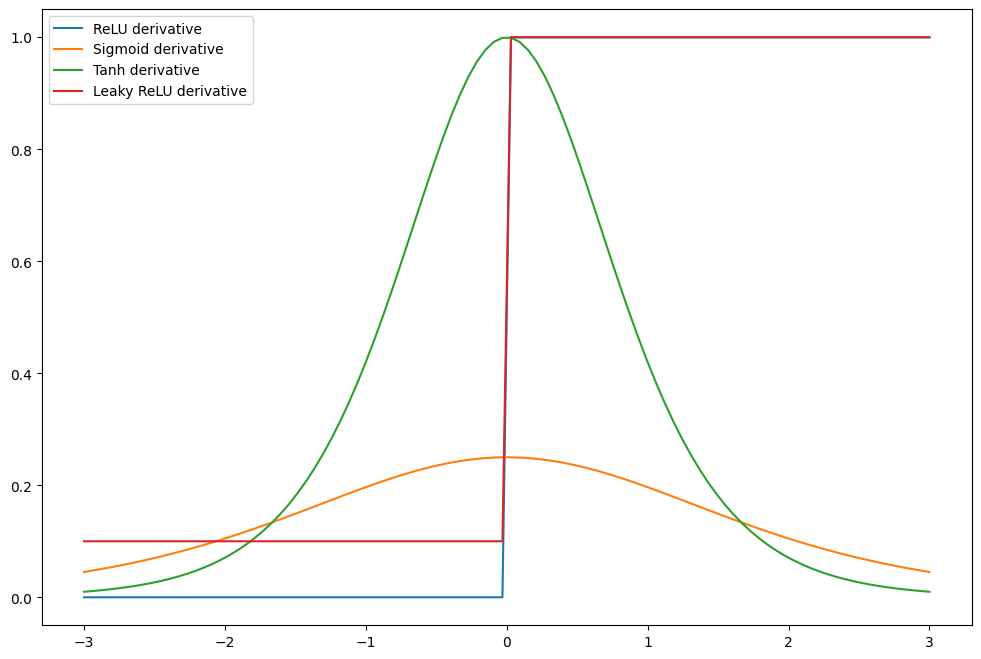

In [67]:
# plot derivatives
plt.figure(figsize=(12, 8))
plt.plot(x.detach().numpy(), relu_deriv, label='ReLU derivative')
plt.plot(x.detach().numpy(), sigmoid_deriv, label='Sigmoid derivative')
plt.plot(x.detach().numpy(), tanh_deriv, label='Tanh derivative')
plt.plot(x.detach().numpy(), leaky_relu_deriv, label='Leaky ReLU derivative')
plt.legend()